In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
try:
    sqlite_connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
    print('УСПЕШНО')
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)

УСПЕШНО


In [2]:
df = pd.read_csv('../data/ab-test.csv')

график средних отклонений 

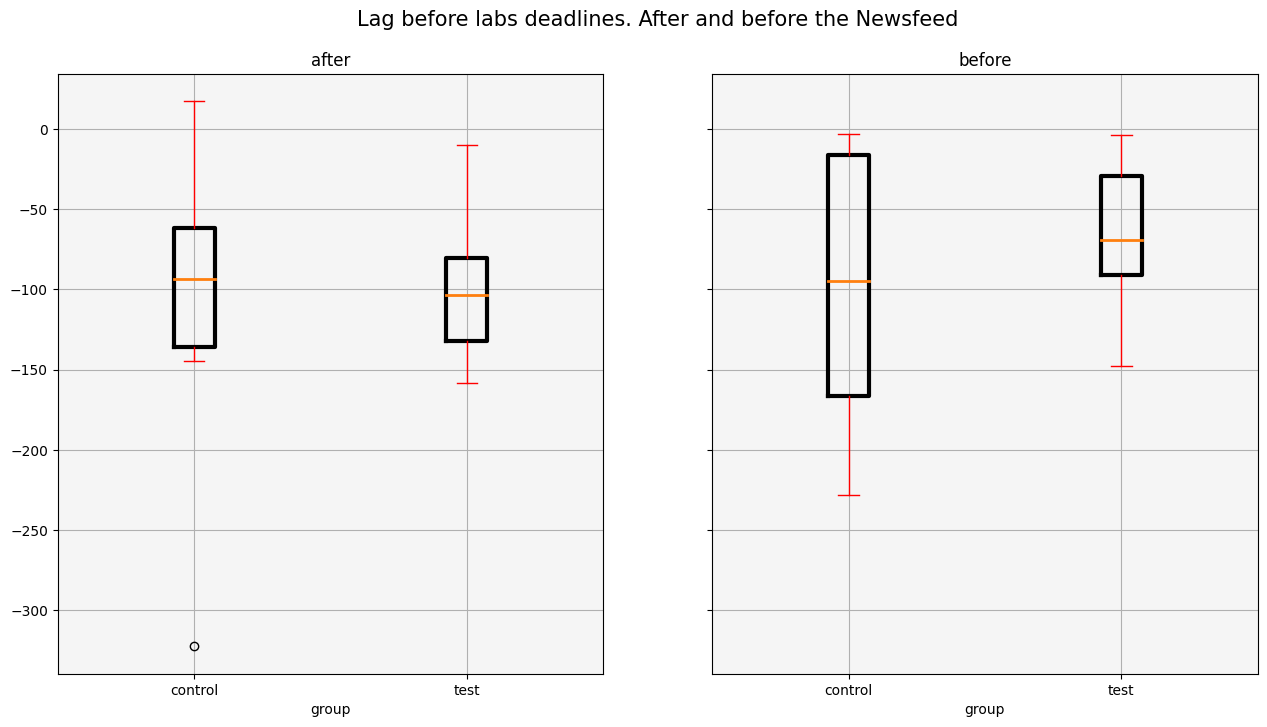

In [10]:
fig, ax = plt.subplots(1, 2,
                       sharey=True,
                       figsize=(15, 8))
df[df['time'] == 'after'].boxplot(column='diff',
                                  by='group',
                                  ax=ax[0],
                                  color=dict(boxes='green', whiskers='red',
                                             medians='red', caps='red'),
                                  boxprops=dict(linewidth=3),
                                  medianprops=dict(linewidth=2))
df[df['time'] == 'before'].boxplot(column='diff',
                                   by='group',
                                   ax=ax[1],
                                   color=dict(boxes='green', whiskers='red',
                                              medians='red', caps='red'),
                                   boxprops=dict(linewidth=3),
                                   medianprops=dict(linewidth=2))
ax[0].set_title('after')
ax[1].set_title('before')
ax[0].set_facecolor('#F5F5F5')
ax[1].set_facecolor('#F5F5F5')
fig.suptitle(
    'Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

What was the IQR of the control group before the newsfeed?

межквантильный диапазон. Он является примером усеченной оценки , определяемой как усеченный диапазон на 25% , который повышает точность статистики набора данных за счет отбрасывания более низкого вклада, отдаленных точек.  Он также используется в качестве надежной меры масштаба. Его можно четко визуализировать в виде прямоугольника на блочной диаграмме .

In [14]:
iqr = df[(df['time'] == 'before') & (df['group'] == 'test')].describe().loc['75%'].values[0] - \
    df[(df['time'] == 'before') & (df['group'] == 'test')
       ].describe().loc['25%'].values[0]
round(iqr / 10) * 10

60

In [5]:
sqlite_connection.close()